# Pedestrian Crash Analysis

## **General Notes**

### **TODOs**
- Write what every variable means

### **Observations**

- **Observation 1**

- **Analysis of Plot Diagrams**
    - Review the diagrams related to the dataset.
    - HIC values remain consistent for the majority of the analysis.


### **Keyword documentation**
#### **HIC15_max** (Head Injury Criterion)
  
In automotive safety engineering and research, the term HIC15 refers to the Head Injury Criterion with a 15-millisecond duration. This metric is instrumental in evaluating the severity of head injuries resulting from impacts. HIC15 assesses the likelihood and severity of head injury by analyzing the acceleration-time history of a specific point on the head during an impact event.

Despite its critical role in safety assessment, HIC15 is a unitless measure, emphasizing its relative nature in comparing different impact scenarios and assessing the effectiveness of safety measures.

(unitless)

#### **BrIC** (Brain Injury Criterion) 

Is a metric used to evaluate the risk of brain injury resulting from impacts, particularly in automotive safety engineering and research. Similar to HIC (Head Injury Criterion), BrIC analyzes the acceleration-time history of the brain during an impact event. BrIC considers the rotational acceleration of the brain, which is important in assessing the risk of traumatic brain injury (TBI). 

By integrating the rotational acceleration over time, BrIC provides a quantitative measure of the likelihood and severity of brain injury. Like HIC, BrIC is typically calculated over a specified time duration, such as 15 milliseconds. It serves as a valuable tool for assessing the effectiveness of safety measures in reducing the risk of brain injury in automotive crashes and other impact scenarios.

(unitless)

## **Dataset Analysis**

### **Import required libraries**

In [51]:
from pathlib import Path
from enum import Enum
import pandas as pd
from IPython.display import display, HTML
import seaborn as sns
import matplotlib.pyplot as plt
import hashlib
from collections import defaultdict
from pprint import pprint


### **Setup Workflow Settings**

In [52]:
DATASET_PATH = Path("C:\\Users\geork\projects\AIThesis\datasets\\20240510\mlres")
SHOW_DATAFRAMES = False
REMOVE_DUPLICATE_ENTRIES = True
TIMESERIES_TO_COLLECT = [
    "Head_X_Coordinate",
    "Head_Y_Coordinate",
    "Head_Z_Coordinate",
    # 'Chest_X_Acceleration',
    # 'Chest_Y_Acceleration',
    # 'Chest_Z_Acceleration',
    # 'Head_X_Acceleration',
    # 'Head_X_Coordinate',
    # 'Head_X_Rotational_Velocity',
    # 'Head_Y_Acceleration',
    # 'Head_Y_Coordinate',
    # 'Head_Y_Rotational_Velocity',
    # 'Head_Z_Acceleration',
    # 'Head_Z_Coordinate',
    # 'Head_Z_Rotational_Velocity',
    # 'Left_Ankle_X_Coordinate',
    # 'Left_Ankle_Y_Coordinate',
    # 'Left_Ankle_Z_Coordinate',
    # 'Left_Elbow_X_Coordinate',
    # 'Left_Elbow_Y_Coordinate',
    # 'Left_Elbow_Z_Coordinate',
    # 'Left_Knee_X_Coordinate',
    # 'Left_Knee_Y_Coordinate',
    # 'Left_Knee_Z_Coordinate',
    # 'Left_Shoulder_X_Coordinate',
    # 'Left_Shoulder_Y_Coordinate',
    # 'Left_Shoulder_Z_Coordinate',
    # 'Left_Wrist_X_Coordinate',
    # 'Left_Wrist_Y_Coordinate',
    # 'Left_Wrist_Z_Coordinate',
    # 'Pelvis_Center_X_Coordinate',
    # 'Pelvis_Center_Y_Coordinate',
    # 'Pelvis_Center_Z_Coordinate',
    # 'Pelvis_Left_X_Coordinate',
    # 'Pelvis_Left_Y_Coordinate',
    # 'Pelvis_Left_Z_Coordinate',
    # 'Pelvis_Right_X_Coordinate',
    # 'Pelvis_Right_Y_Coordinate',
    # 'Pelvis_Right_Z_Coordinate',
    # 'Pelvis_X_Acceleration',
    # 'Pelvis_X_Coordinate',
    # 'Pelvis_Y_Acceleration',
    # 'Pelvis_Y_Coordinate',
    # 'Pelvis_Z_Acceleration',
    # 'Pelvis_Z_Coordinate',
    # 'Right_Ankle_X_Coordinate',
    # 'Right_Ankle_Y_Coordinate',
    # 'Right_Ankle_Z_Coordinate',
    # 'Right_Elbow_X_Coordinate',
    # 'Right_Elbow_Y_Coordinate',
    # 'Right_Elbow_Z_Coordinate',
    # 'Right_Knee_X_Coordinate',
    # 'Right_Knee_Y_Coordinate',
    # 'Right_Knee_Z_Coordinate',
    # 'Right_Shoulder_X_Coordinate',
    # 'Right_Shoulder_Y_Coordinate',
    # 'Right_Shoulder_Z_Coordinate',
    # 'Right_Wrist_X_Coordinate',
    # 'Right_Wrist_Y_Coordinate',
    # 'Right_Wrist_Z_Coordinate',
    # 'Sternum_X_Coordinate',
    # 'Sternum_Y_Coordinate',
    # 'Sternum_Z_Coordinate'
]

### **Configure dataset folder path**

In [53]:
while not DATASET_PATH.exists():
    DATASET_PATH = Path(input("Enter dataset path: "))

if DATASET_PATH.exists():
    print(f"Dataset path: {DATASET_PATH}")


Dataset path: C:\Users\geork\projects\AIThesis\datasets\20240510\mlres


### **Gather analysis files**

In [54]:
if not DATASET_PATH.exists():
    raise Exception(f"Directory does not exist: {DATASET_PATH}")

file_count = sum(1 for item in DATASET_PATH.iterdir() if item.is_file())
items = [item for item in DATASET_PATH.iterdir() if item.is_file()]
print(f"Total number of crash cases: {len(items)}")


Total number of crash cases: 1200


### **Detect equal files**
This snippet collects all files applies hashing to them.
It checks for completely equal files.

In [55]:
hash2items = defaultdict(list)

for item in items:
    with open(item, "r", encoding="utf-8") as fp:
        contents = fp.read().encode("utf-8")
        hash_object = hashlib.sha256()
        hash_object.update(contents)
        unique_key = hash_object.hexdigest()
        hash2items[unique_key].append(item)

#### **Show equal files as groups**

In [56]:
group_id = 1
text = ""
for key, items in hash2items.items():
    if len(items) > 1:
        text += f"Equal files group: {group_id}. Entries: {len(items)}<br>"
        for item in items:
            text += f"{item}<br>"
        group_id += 1

if text:
    html = "<div style='overflow:auto; height:300px;'>{}</div>".format(text)
    display(HTML(html))


#### **Keep only unique files**

This snippet removes duplicate files.

In [57]:
if REMOVE_DUPLICATE_ENTRIES:
    filtered = [items[0] for key, items in hash2items.items() if len(items) == 1]
    print(f"Remaining entries: {len(filtered)}")
    items = filtered

Remaining entries: 1200


### Define Responses-Trajectory-DatasetEntry

In [58]:
class Responses:
    __slots__=("hic15", "hic36", 
               "head_z_acc_abs_max", "head_x_acc_abs_max", "head_y_acc_abs_max",
               "bric_abs_max",
               "chest_resultant_acc_max", "chest_resultant_acc_clip_3ms_max")

    def __init__(self):
        self.hic15 = 0
        self.hic36 = 0
        self.head_x_acc_abs_max = 0
        self.head_y_acc_abs_max = 0
        self.head_z_acc_abs_max = 0
        self.bric_abs_max = 0
        self.chest_resultant_acc_max = 0
        self.chest_resultant_acc_clip_3ms_max = 0

    def to_dict(self):
        d = dict()
        d["HIC15_max"] = self.hic15
        d["HIC36_max"] = self.hic36
        d["Head_Z_Acceleration_abs_max"] = self.head_z_acc_abs_max
        d["Head_X_Acceleration_abs_max"] = self.head_x_acc_abs_max
        d["Head_Y_Acceleration_abs_max"] = self.head_y_acc_abs_max
        d["BrIC_abs_max"] = self.bric_abs_max
        d["Chest_Resultant_Acceleration_max"] = self.chest_resultant_acc_max
        d["Chest_Resultant_Acceleration_CLIP3ms_max"] = self.chest_resultant_acc_clip_3ms_max
        return d
    

class Trajectory:
    __slots__=("name", "values")
    def __init__(self, name: str, values: list):
        self.name = name
        self.values = values


class DatasetEntry(object):
    class CarProfile(Enum):
        FCR = 1,
        MPV = 2,
        RDS = 3,
        SUV = 4

    class Position(Enum):
        POS = 1

    __slots__=("path", "type", "velocity", "rotation", "translation", "position", "responses", "timeseries")

    def __init__(self, path: str, type: CarProfile, vel: int, transl, rot, pos, responses, timeseries: list):
        self.path : str = path
        self.type : "CarProfile" = type
        self.velocity : int = vel
        self.translation : int = transl
        self.rotation : int = rot
        self.position : str = pos
        self.responses : "Responses" = responses
        self.timeseries: "[Trajectory]" = timeseries
    
    def to_dict(self):
        d = dict()
        d["Path"] = self.path
        d["CarProfile"] = self.type.name
        d["Velocity"] = self.velocity
        d["Translation"] = self.translation
        d["Rotation"] = self.rotation
        d["Position"] = self.position
        d.update(self.responses.to_dict())
        for timeseries_entry in self.timeseries:
            d.update({timeseries_entry.name : timeseries_entry.values})
        return d

### **Define Parser/Lexer for file reading**

In [59]:
class Lexer():
    __slots__=("path", "lines", "cur_line")
    def __init__(self, f: str):
        self.path = f
        with open(f, "r") as fp:
            self.lines = fp.readlines()
        self.cur_line = 0
    
    def is_eof(self):
        return self.cur_line >= len(self.lines)

class Parser:
    __slots__=("lexer", "timeseries_to_collect", "history_labels")

    class ResponsesIndex(Enum):
        HIC15_max = 2
        HIC36_max = 3
        Head_Z_Acceleration_abs_max = 4
        Head_X_Acceleration_abs_max = 5
        Head_Y_Acceleration_abs_max = 6
        BrIC_abs_max = 7
        Chest_Resultant_Acceleration_max = 8
        Chest_Resultant_Acceleration_CLIP3ms_max = 9
    
    def __init__(self, lexer: Lexer):
        self.lexer = lexer
        self.timeseries_to_collect = []
        self.history_labels = set()
    
    def set_accepted_timeseries_name(self, timeseries_label):
        self.timeseries_to_collect.append(timeseries_label)
    
    def get_value(self, lines: list, index: ResponsesIndex):
        splitted = lines[index.value].strip().split(",")
        if splitted[1] != index.name:
            raise Exception(f"Expecting {index.name}, got: {splitted[1]} for index: {index.value}")
        
        return round(float(splitted[2]), 3)

    def parse_responses(self, lines: list) -> Responses:
        istart = 1
        iend   = 10
        
        if lines[istart].strip() != "RESPONSES":
            raise Exception(f"Expecting RESPONSES at line 2, got {lines[istart].strip()}")
         
        if lines[iend].strip() != "END":
            raise Exception(f"Expecting END at line 2, got {lines[iend].strip()}") 
        
        response = Responses()
        response.hic15 = self.get_value(lines, Parser.ResponsesIndex.HIC15_max)
        response.hic36 = self.get_value(lines, Parser.ResponsesIndex.HIC36_max)
        response.head_x_acc_abs_max = self.get_value(lines, Parser.ResponsesIndex.Head_X_Acceleration_abs_max)
        response.head_y_acc_abs_max = self.get_value(lines, Parser.ResponsesIndex.Head_Y_Acceleration_abs_max)
        response.head_z_acc_abs_max = self.get_value(lines, Parser.ResponsesIndex.Head_Z_Acceleration_abs_max)
        response.bric_abs_max = self.get_value(lines, Parser.ResponsesIndex.BrIC_abs_max)
        response.chest_resultant_acc_max = self.get_value(lines, Parser.ResponsesIndex.Chest_Resultant_Acceleration_max)
        response.chest_resultant_acc_clip_3ms_max = self.get_value(lines, Parser.ResponsesIndex.Chest_Resultant_Acceleration_CLIP3ms_max)
        return response
    
    def parse_features(self, f: str):
        type_str, vel_str, transl_str, rot_str, pos_str = f.stem.split("_")
        car_type = DatasetEntry.CarProfile[type_str.split('=')[1]]
        velocity = int(vel_str.split('=')[1])
        translation = int(transl_str.split('=')[1])
        rotation = int(rot_str.split('=')[1])
        position = pos_str.split('=')[1]
        return (car_type, velocity, translation, rotation, position)

    def parse_trajectories(self, lines: list) -> [Trajectory]:
        trajectories = []
        if not lines[11].startswith("HISTORY"):
            raise Exception(f"Expected line starting with \"HISTORY\" at line 12, got: {lines[11]}")
        self.lexer.cur_line = 11
        i = 1
        while not self.is_eof():
            traj = self.parse_trajectory()  
            if traj:          
                trajectories.append(traj)
                # if len(traj.values) != 301:
                #     print(f"Reading trajectories from {self.lexer.path}")
                #     print(f"Read {traj.name}. Number values: {len(traj.values)}")
            self.eat()
            i += 1

        return trajectories

    def parse(self):
        type, velocity, translation, rot, pos = self.parse_features(self.lexer.path)
        responses = self.parse_responses(self.lexer.lines)
        trajectories = self.parse_trajectories(self.lexer.lines)
        entry = DatasetEntry(self.lexer.path, type, velocity, translation, rot, pos, responses, trajectories)
        return entry

    def eat(self):
        self.lexer.cur_line += 1
        while True:
            if self.is_eof():
                break
            elif self.cur_line() == "": # eat whitespaces
                self.lexer.cur_line += 1
            else:
                break
                
    def is_eof(self):
        return self.lexer.is_eof()

    def cur_line(self):
        return self.lexer.lines[self.lexer.cur_line]
    
    def parse_trajectory_name(self):
        return self.cur_line().split(" : ")[-1].strip()

    def parse_trajectory_values(self):
        values = []
        while not self.is_eof() and not self.cur_line().startswith("END"):
            time, val = self.cur_line().split(" , ")
            values.append((round(float(time), 3), round(float(val), 3)))
            self.eat()
        return values
    
    def timeseries_accepted(self, line):
        return line.split(" : ")[-1].strip() in self.timeseries_to_collect

    def parse_trajectory(self):
        if self.cur_line().startswith("HISTORY"):
            self.history_labels.add(self.parse_trajectory_name())

        if self.cur_line().startswith("HISTORY") and self.timeseries_accepted(self.cur_line()):
            name = self.parse_trajectory_name()
            self.eat()
            values = self.parse_trajectory_values()
            traj = Trajectory(name, values)
            return traj
            

In [60]:
def show_as_table(df: pd.DataFrame):
    #print(df)
    # Assuming 'df' is your DataFrame
    df_html = df.to_html()

    # HTML template with CSS for scrollbar
    html_template = f"""
    <div style="overflow-x: auto; overflow-y: auto; max-height: 300px;">
    {df_html}
    </div>
    """

    # Display HTML content
    display(HTML(html_template))

### **Read files and create dataframe**

In [61]:
entries = list()
history_labels = set()

for item in items:
    lexer = Lexer(item)
    parser = Parser(lexer)
    for timeseries_name in TIMESERIES_TO_COLLECT:
        parser.set_accepted_timeseries_name(timeseries_name)
    entry: DatasetEntry = parser.parse()
    entries.append(entry.to_dict())
    history_labels.update(parser.history_labels)
    
df = pd.DataFrame(entries)

if SHOW_DATAFRAMES:
    show_as_table(df)


In [62]:
pprint(history_labels)

{'Chest_X_Acceleration',
 'Chest_Y_Acceleration',
 'Chest_Z_Acceleration',
 'Head_X_Acceleration',
 'Head_X_Coordinate',
 'Head_X_Rotational_Velocity',
 'Head_Y_Acceleration',
 'Head_Y_Coordinate',
 'Head_Y_Rotational_Velocity',
 'Head_Z_Acceleration',
 'Head_Z_Coordinate',
 'Head_Z_Rotational_Velocity',
 'Left_Ankle_X_Coordinate',
 'Left_Ankle_Y_Coordinate',
 'Left_Ankle_Z_Coordinate',
 'Left_Elbow_X_Coordinate',
 'Left_Elbow_Y_Coordinate',
 'Left_Elbow_Z_Coordinate',
 'Left_Knee_X_Coordinate',
 'Left_Knee_Y_Coordinate',
 'Left_Knee_Z_Coordinate',
 'Left_Shoulder_X_Coordinate',
 'Left_Shoulder_Y_Coordinate',
 'Left_Shoulder_Z_Coordinate',
 'Left_Wrist_X_Coordinate',
 'Left_Wrist_Y_Coordinate',
 'Left_Wrist_Z_Coordinate',
 'Pelvis_Center_X_Coordinate',
 'Pelvis_Center_Y_Coordinate',
 'Pelvis_Center_Z_Coordinate',
 'Pelvis_Left_X_Coordinate',
 'Pelvis_Left_Y_Coordinate',
 'Pelvis_Left_Z_Coordinate',
 'Pelvis_Right_X_Coordinate',
 'Pelvis_Right_Y_Coordinate',
 'Pelvis_Right_Z_Coordinate'

### **Group simulations per HIC**

In [63]:
distinct_counts = df['HIC15_max'].value_counts()
print("Distinct counts using value_counts():")
print(distinct_counts)
largest_index = distinct_counts.idxmax()

# Using nunique() to count distinct items
distinct_count = df['HIC15_max'].nunique()
print("\nDistinct count using nunique():", distinct_count)

# Filter the DataFrame to get values of "Path" for items with value "A" in "Column1"
filtered_paths = df.loc[df['HIC15_max'] == largest_index, 'Path']

# Get a specific number of items, for example, 10
filtered_paths_10 = filtered_paths.head(10)
print(f"First 10 paths for items with value '{largest_index}' in 'Column1':")
for path in filtered_paths:
    print(path)

Distinct counts using value_counts():
HIC15_max
0.000        12
86.843        1
4286.783      1
6670.390      1
9787.096      1
             ..
39940.610     1
19900.030     1
11397.127     1
101.250       1
1861.807      1
Name: count, Length: 1189, dtype: int64

Distinct count using nunique(): 1189
First 10 paths for items with value '0.0' in 'Column1':
C:\Users\geork\projects\AIThesis\datasets\20240510\mlres\Type=FCR_Vel=100_tra=0_rot=330_pos=initial.txt
C:\Users\geork\projects\AIThesis\datasets\20240510\mlres\Type=FCR_Vel=100_tra=200_rot=330_pos=initial.txt
C:\Users\geork\projects\AIThesis\datasets\20240510\mlres\Type=FCR_Vel=100_tra=400_rot=150_pos=initial.txt
C:\Users\geork\projects\AIThesis\datasets\20240510\mlres\Type=FCR_Vel=40_tra=0_rot=180_pos=initial.txt
C:\Users\geork\projects\AIThesis\datasets\20240510\mlres\Type=FCR_Vel=40_tra=0_rot=60_pos=initial.txt
C:\Users\geork\projects\AIThesis\datasets\20240510\mlres\Type=FCR_Vel=40_tra=400_rot=90_pos=initial.txt
C:\Users\geork\pr

In [76]:
# Sort the DataFrame based on 'HIC15_max' column in ascending order
sorted_df_asc = df.sort_values(by='HIC15_max', ascending=True)

# Sort the DataFrame based on 'HIC15_max' column in descending order
sorted_df_desc = df.sort_values(by='HIC15_max', ascending=False)

# Print the sorted DataFrames
# print("DataFrame sorted by 'HIC15_max' in ascending order:")
# print(sorted_df_asc)

# print("\nDataFrame sorted by 'HIC15_max' in descending order:")
# print(sorted_df_desc)

In [80]:
threshold = 1000
count = 0
# Filter the sorted DataFrame by 'HIC15_max' > threshold
filtered_df_desc = sorted_df_desc[sorted_df_desc['HIC15_max'] > threshold]

# Print only the 'Path' and 'HIC15_max' values for the filtered DataFrame
print(f"Rows with 'HIC15_max' over {threshold} sorted in descending order:")

for index, row in filtered_df_desc.iterrows():
    print("Path:", row['Path'], "- HIC15_max:", row['HIC15_max'])
    count += 1
print(f"Number of runs of HIC15 over {threshold}: {count}")

Rows with 'HIC15_max' over 1000 sorted in descending order:
Path: C:\Users\geork\projects\AIThesis\datasets\20240510\mlres\Type=MPV_Vel=100_tra=0_rot=120_pos=initial.txt - HIC15_max: 277304.682
Path: C:\Users\geork\projects\AIThesis\datasets\20240510\mlres\Type=MPV_Vel=100_tra=-200_rot=120_pos=initial.txt - HIC15_max: 271710.697
Path: C:\Users\geork\projects\AIThesis\datasets\20240510\mlres\Type=MPV_Vel=100_tra=0_rot=60_pos=initial.txt - HIC15_max: 254764.373
Path: C:\Users\geork\projects\AIThesis\datasets\20240510\mlres\Type=MPV_Vel=80_tra=-200_rot=120_pos=initial.txt - HIC15_max: 250956.668
Path: C:\Users\geork\projects\AIThesis\datasets\20240510\mlres\Type=MPV_Vel=100_tra=-200_rot=60_pos=initial.txt - HIC15_max: 249033.612
Path: C:\Users\geork\projects\AIThesis\datasets\20240510\mlres\Type=MPV_Vel=100_tra=-200_rot=90_pos=initial.txt - HIC15_max: 231618.089
Path: C:\Users\geork\projects\AIThesis\datasets\20240510\mlres\Type=MPV_Vel=60_tra=200_rot=60_pos=initial.txt - HIC15_max: 21963

### **Dataframe Insights**

In [64]:
# Display statistical summary for numerical columns
describe_summary = df.describe()

print("Dataframe columns")
display(df.columns)
print("Statistical Summary:")
display(describe_summary)


Dataframe columns


Index(['Path', 'CarProfile', 'Velocity', 'Translation', 'Rotation', 'Position',
       'HIC15_max', 'HIC36_max', 'Head_Z_Acceleration_abs_max',
       'Head_X_Acceleration_abs_max', 'Head_Y_Acceleration_abs_max',
       'BrIC_abs_max', 'Chest_Resultant_Acceleration_max',
       'Chest_Resultant_Acceleration_CLIP3ms_max', 'Head_X_Coordinate',
       'Head_Y_Coordinate', 'Head_Z_Coordinate'],
      dtype='object')

Statistical Summary:


,Velocity,Translation,Rotation,HIC15_max,HIC36_max,Head_Z_Acceleration_abs_max,Head_X_Acceleration_abs_max,Head_Y_Acceleration_abs_max,BrIC_abs_max,Chest_Resultant_Acceleration_max,Chest_Resultant_Acceleration_CLIP3ms_max
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,60.000000,0.000000,165.000000,10594.607520,10652.672504,180.719489,394.208552,75.802166,1.303544,84.476583,44.840720
std,28.296064,282.960637,103.604754,28156.535615,28139.017094,282.624541,493.584543,110.310997,0.366405,85.290332,28.531109
min,20.000000,-400.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,-200.000000,82.500000,444.451250,452.599750,45.476000,88.814250,24.575750,1.044750,38.257000,29.435750
50%,60.000000,0.000000,165.000000,1826.896500,1916.050500,87.955500,175.477500,44.062500,1.240500,52.621000,39.336000
75%,80.000000,200.000000,247.500000,7791.743000,7791.743000,205.229500,574.613750,79.931250,1.591250,87.399250,51.999250
max,100.000000,400.000000,330.000000,277304.682000,277304.682000,2459.717000,2988.801000,1487.029000,2.229000,549.682000,271.300000


#### **Plot diagrams related to the dataset**

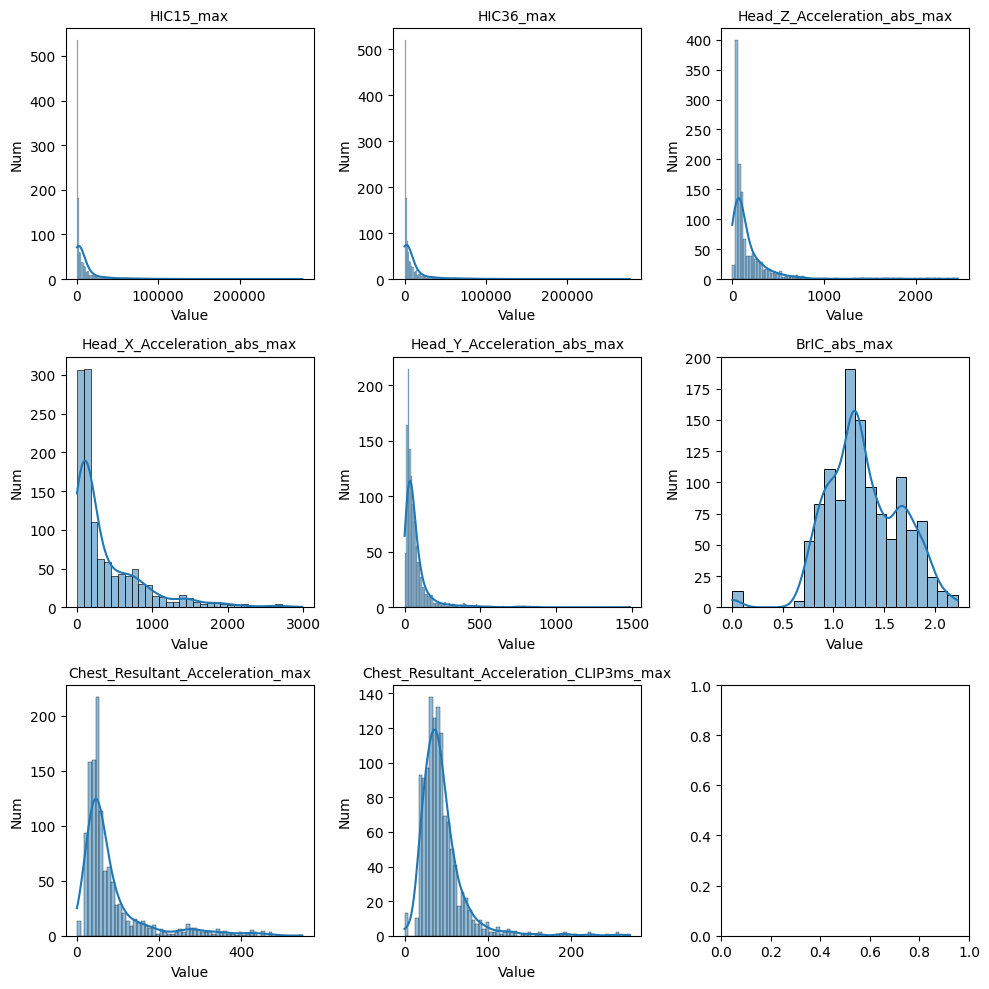

In [69]:

# Create a 3x3 grid of histograms
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

# Flatten the axes for easy iteration
axes = axes.flatten()

selected_numerical_columns = ['HIC15_max', "HIC36_max", 
                              "Head_Z_Acceleration_abs_max", "Head_X_Acceleration_abs_max", "Head_Y_Acceleration_abs_max",
                              "BrIC_abs_max",
                              "Chest_Resultant_Acceleration_max","Chest_Resultant_Acceleration_CLIP3ms_max"]  # Specify columns you want to plot

# Plot histograms for selected numerical columns
for i, column in enumerate(selected_numerical_columns):
    sns.histplot(df[column], kde=True, ax=axes[i])
    axes[i].set_title(f'{column}', fontsize=10)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Num')
    axes[i].tick_params(axis='x', labelrotation=0)

# Adjust layout
plt.tight_layout()
plt.show()


## Create crash tranjectory dataframe

In [66]:
def show_trajectory(entries, label):
    # Create a figure and axes for the plot
    fig, ax = plt.subplots(figsize=(10, 6))

    # Iterate over each entry in the "label" column
    for i, points_list in enumerate(entries):
        # Extract time and X coordinate values from the points list
        time_values = [point[0] for point in points_list]
        x_values = [point[1] for point in points_list]
        if len(x_values) < 301:
           # print(len(x_values))
            x_values += [0] * (301 - len(x_values))
            #print(len(x_values))
        # Check if the length of time_values is less than 301
        if len(time_values) < 301:
            # Calculate the number of missing entries
            missing_entries = 301 - len(time_values)
            # Generate milliseconds for the missing entries, add the last millisecond recorded.
            additional_time_values = [time_values[-1] for i in range(1, missing_entries + 1)]
            # Extend the original list with the missing entries
            time_values.extend(additional_time_values)
        
        # Plot the time vs label values
        ax.plot(time_values, x_values, linewidth=0.5)

    # Set labels and title
    ax.set_xlabel("Time (milliseconds)")
    ax.set_ylabel(label)
    ax.set_title(f"{label} over Time")

    # Show plot
    plt.grid(True)
    plt.tight_layout()
    plt.show()

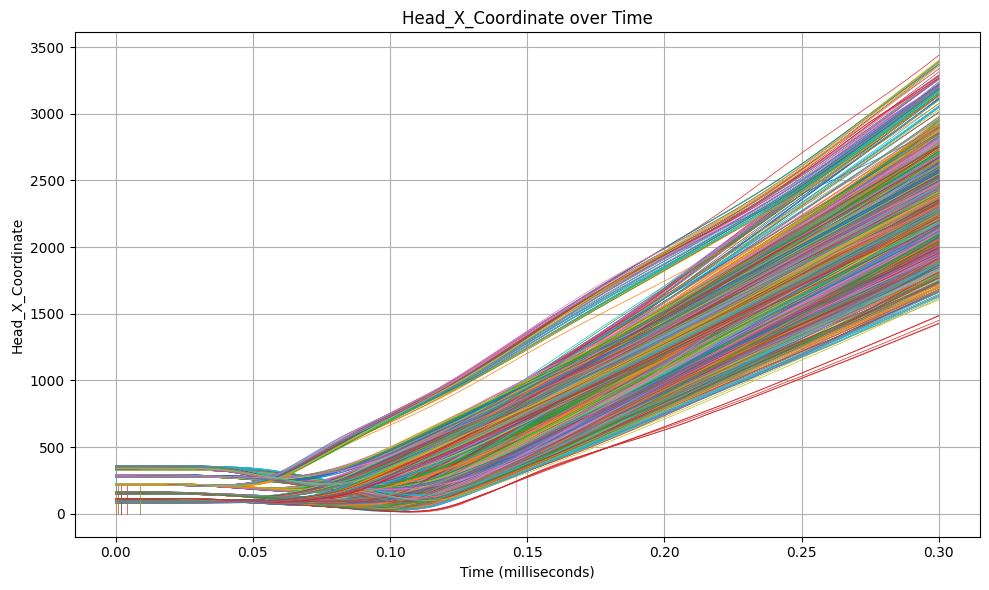

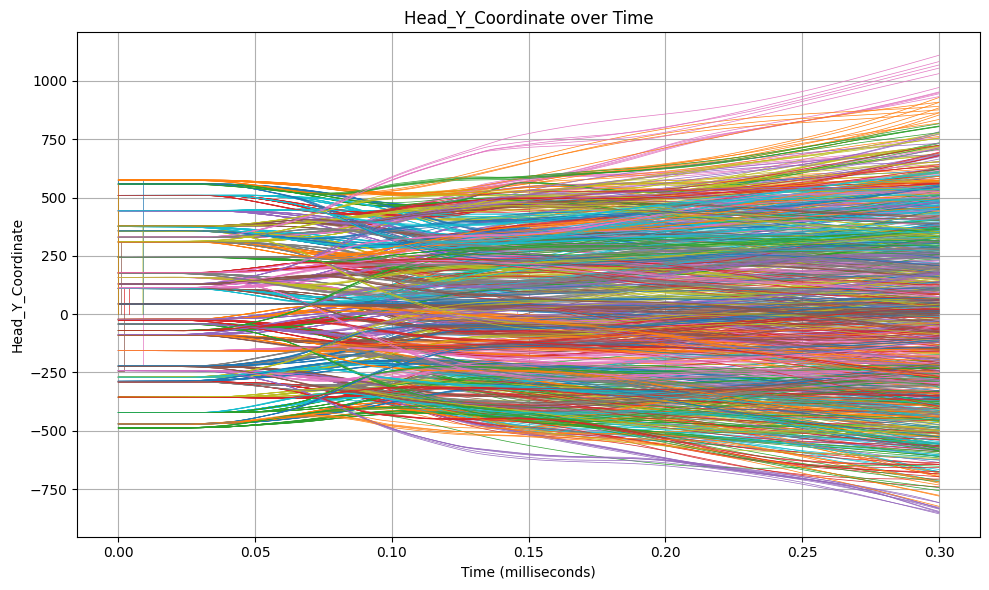

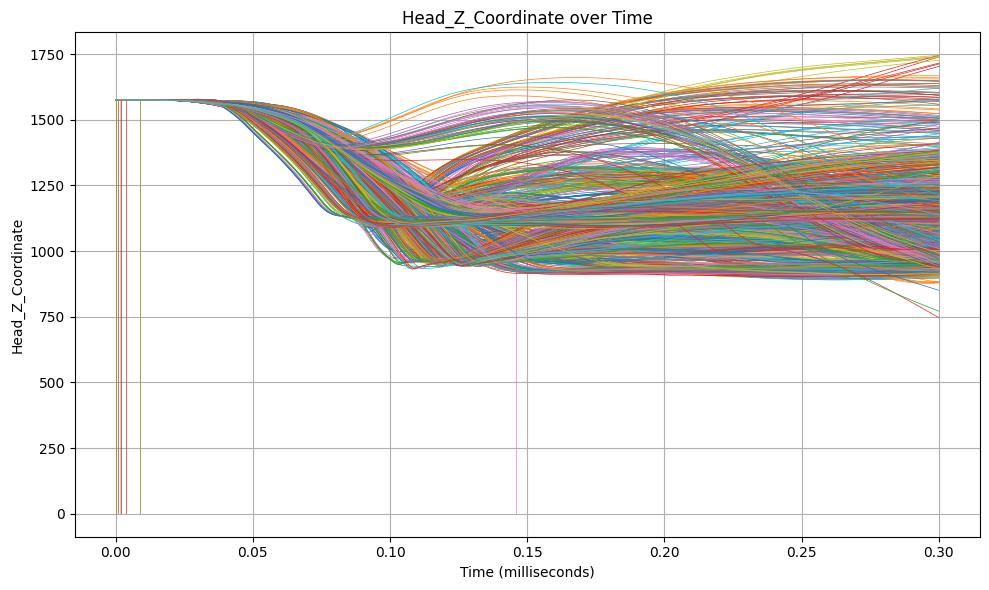

In [67]:
show_trajectory(df["Head_X_Coordinate"],  "Head_X_Coordinate")
show_trajectory(df["Head_Y_Coordinate"],  "Head_Y_Coordinate")
show_trajectory(df["Head_Z_Coordinate"],  "Head_Z_Coordinate")